# Determining the Ice thickness of Vatnajokull based on H/V spectral ratio

In [10]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
root = "D:\MEMOIRE\Ice_thickness"
alt_glacier = '\point_altitude_glacier\point_altitude_glacier.csv'
station = "\lt_nodes_ablation_lambert.csv"
hvsr_fold = "D:\MEMOIRE\Geopsy_res\DATE_7_12"

In [12]:
with open(root+alt_glacier) as file :
    glac_alt = []
    pos = []
    line = 0
    readcsv = csv.reader(file, delimiter=',')
    for row in readcsv :
        if line > 0 :
            glac_alt.append(float(row[-1]))
            pos.append(float(row[3])/1000)
        line += 1
print(len(pos))
print(len(glac_alt))

1430
1430


In [13]:
filepath = root+station
print(filepath)
with open(filepath) as file :
    stt = []
    readcsv = csv.reader(file, delimiter=',')
    i = 0
    line = 0
    for row in readcsv :
        if line > 0 :
            stt.append([row[1]])
            stt[i].extend(row[4:7])
            i += 1
        line += 1
        
def sortThird(val):
    return val[2]
stt.sort(key=sortThird)

node_alt = []
name_station = []
for line in stt :
    node_alt.append(float(line[3]))
    name_station.append(line[0])

print(len(node_alt))

D:\MEMOIRE\Ice_thickness\lt_nodes_ablation_lambert.csv
6


In [36]:
stt

[['20773', '1756930.67057778', '1205501.31065622', '852'],
 ['20781', '1757497.77467811', '1211646.50005961', '1010'],
 ['20769', '1757998.30222875', '1219120.85828483', '1159'],
 ['20774', '1763952.64283821', '1223207.58530924', '1294'],
 ['20739', '1769274.68255682', '1227414.53980666', '1445'],
 ['20754', '1772111.64287197', '1232383.33887074', '1505']]

In [14]:
def distance_station(stt) :
    DIST_orign = [0]
    for i in range(1,len(stt)) :
        diff_X = float(stt[i][1]) - float(stt[i-1][1])
        diff_Y = float(stt[i][2]) - float(stt[i-1][2])
        dist = (diff_X**2+diff_Y**2)**(1/2)
        DIST_orign.append((DIST_orign[i-1]*1000+dist)/1000)
    return DIST_orign
DIST = distance_station(stt)
print(len(DIST))
#print(DIST)

6


In [15]:
print(name_station)

['20773', '20781', '20769', '20774', '20739', '20754']


###### La oldest ice : Qu'est-ce que c'est ? partir sur où on la trouve, comment on la trouve et quel est l'intéret.

In [16]:
F0 = []
vs = 1900
H = []

YERRORHIGH = []
YERRORLOW = []
YERROR = []

FREQ = []
AMP_AVE = []

for nme_stt in name_station :   
    filepath = hvsr_fold+'\SS_'+ nme_stt +'.hv'
    print(filepath)
    line = 0
    with open(filepath) as file :
        tmpFREQ = []
        tmpAMP_AVE = []
        readcsv = csv.reader(file, delimiter='\t')
        for row in readcsv :
            line += 1
            if line == 5 :
                #print(row)
                f0 = float(row[1]) #extracting the f0 in the hv file
                #print(row[2])
                F0.append(f0)
                h = vs/(4.0*f0) #calculation of ice thickness
                H.append(h) #save ice thickness in a list
                yhigh = vs/(4.0*(float(row[3]))) #calculate the standart deviation of f0
                ylow = vs/(4.0*(float(row[2])))
                YERRORHIGH.append(h-yhigh)
                YERRORLOW.append(ylow-h)
            if line >= 10 and float(row[0]) >= 0.5  :
                tmpFREQ.append(float(row[0]))
                tmpAMP_AVE.append(float(row[1]))
    FREQ.append(np.array(tmpFREQ))
    AMP_AVE.append(np.array(tmpAMP_AVE))

FREQ = np.array(FREQ, dtype=object)
AMP_AVE = np.array(AMP_AVE, dtype=object)

BED_ALT = np.subtract(node_alt, H)
XERROR = ((vs/4)*np.power(F0, -1))/1000 #Lambda/4 where lambda = Vs/f0
#YERRORHIGH = 10*np.array(YERRORHIGH)
YERROR.append(YERRORLOW)
YERROR.append(YERRORHIGH)
#print(F0)
#print(H)
#print(BED_ALT)
#print(XERROR)
#print(YERROR)

D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20773.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20781.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20769.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20774.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20739.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20754.hv


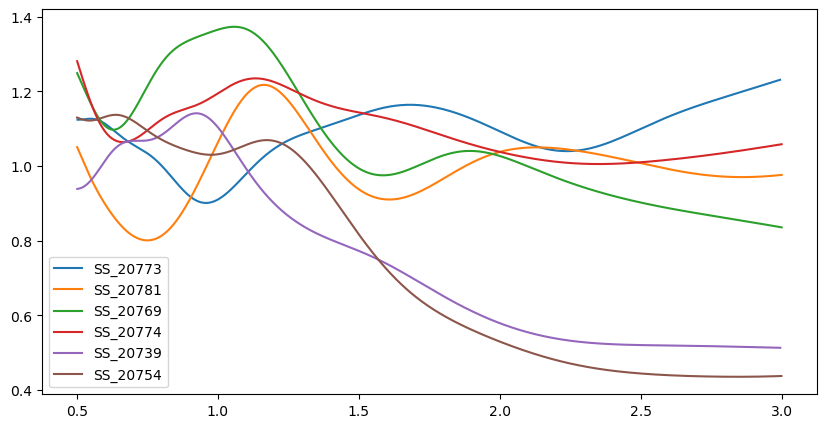

In [17]:
fig = plt.figure(figsize=(10,5))
for i in range(len(FREQ)) :
    plt.plot(FREQ[i], AMP_AVE[i], label='SS_'+str(name_station[i]))
plt.legend()
plt.savefig('plot_ice_thick/HVCurve.png')
plt.show()

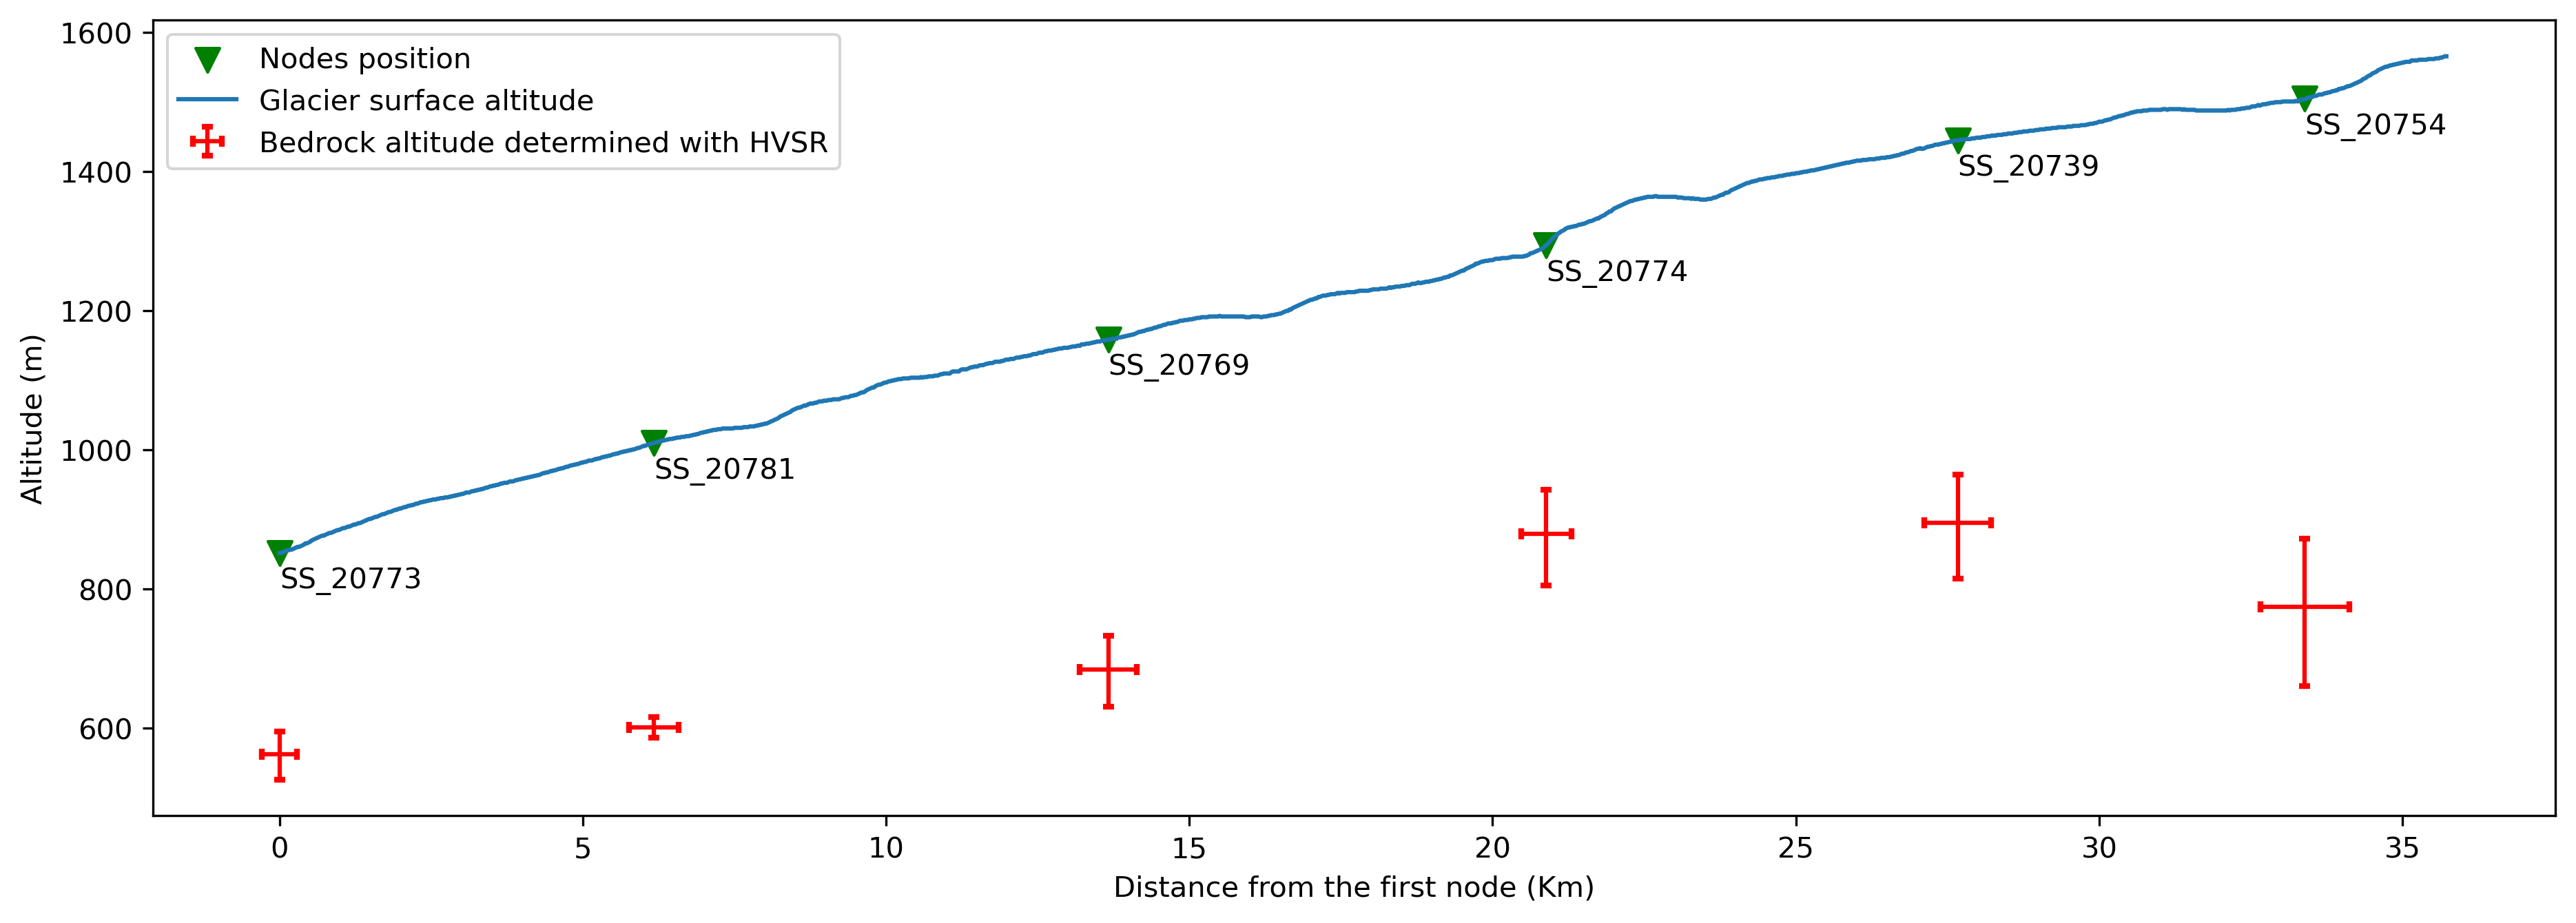

In [19]:
plt.figure(figsize=(15, 5), dpi=300)
plt.scatter(DIST, node_alt, s=70 , c='green', marker='v', label = 'Nodes position')
#plt.scatter(DIST, BED_ALT, s=60, c='red',marker='o')
plt.plot(pos, glac_alt, label = 'Glacier surface altitude')
plt.errorbar(DIST,BED_ALT,xerr = XERROR, yerr = YERROR, linestyle='None', ecolor= 'red', capsize=2, capthick=2, label = 'Bedrock altitude determined with HVSR')
for i in range(len(DIST)) :
    plt.text(DIST[i],node_alt[i]-50,'SS_'+name_station[i])
plt.xlabel('Distance from the first node (Km)')
plt.ylabel('Altitude (m)')
plt.legend()
plt.savefig('plot_ice_thick/ice_thickness.png')
plt.show()

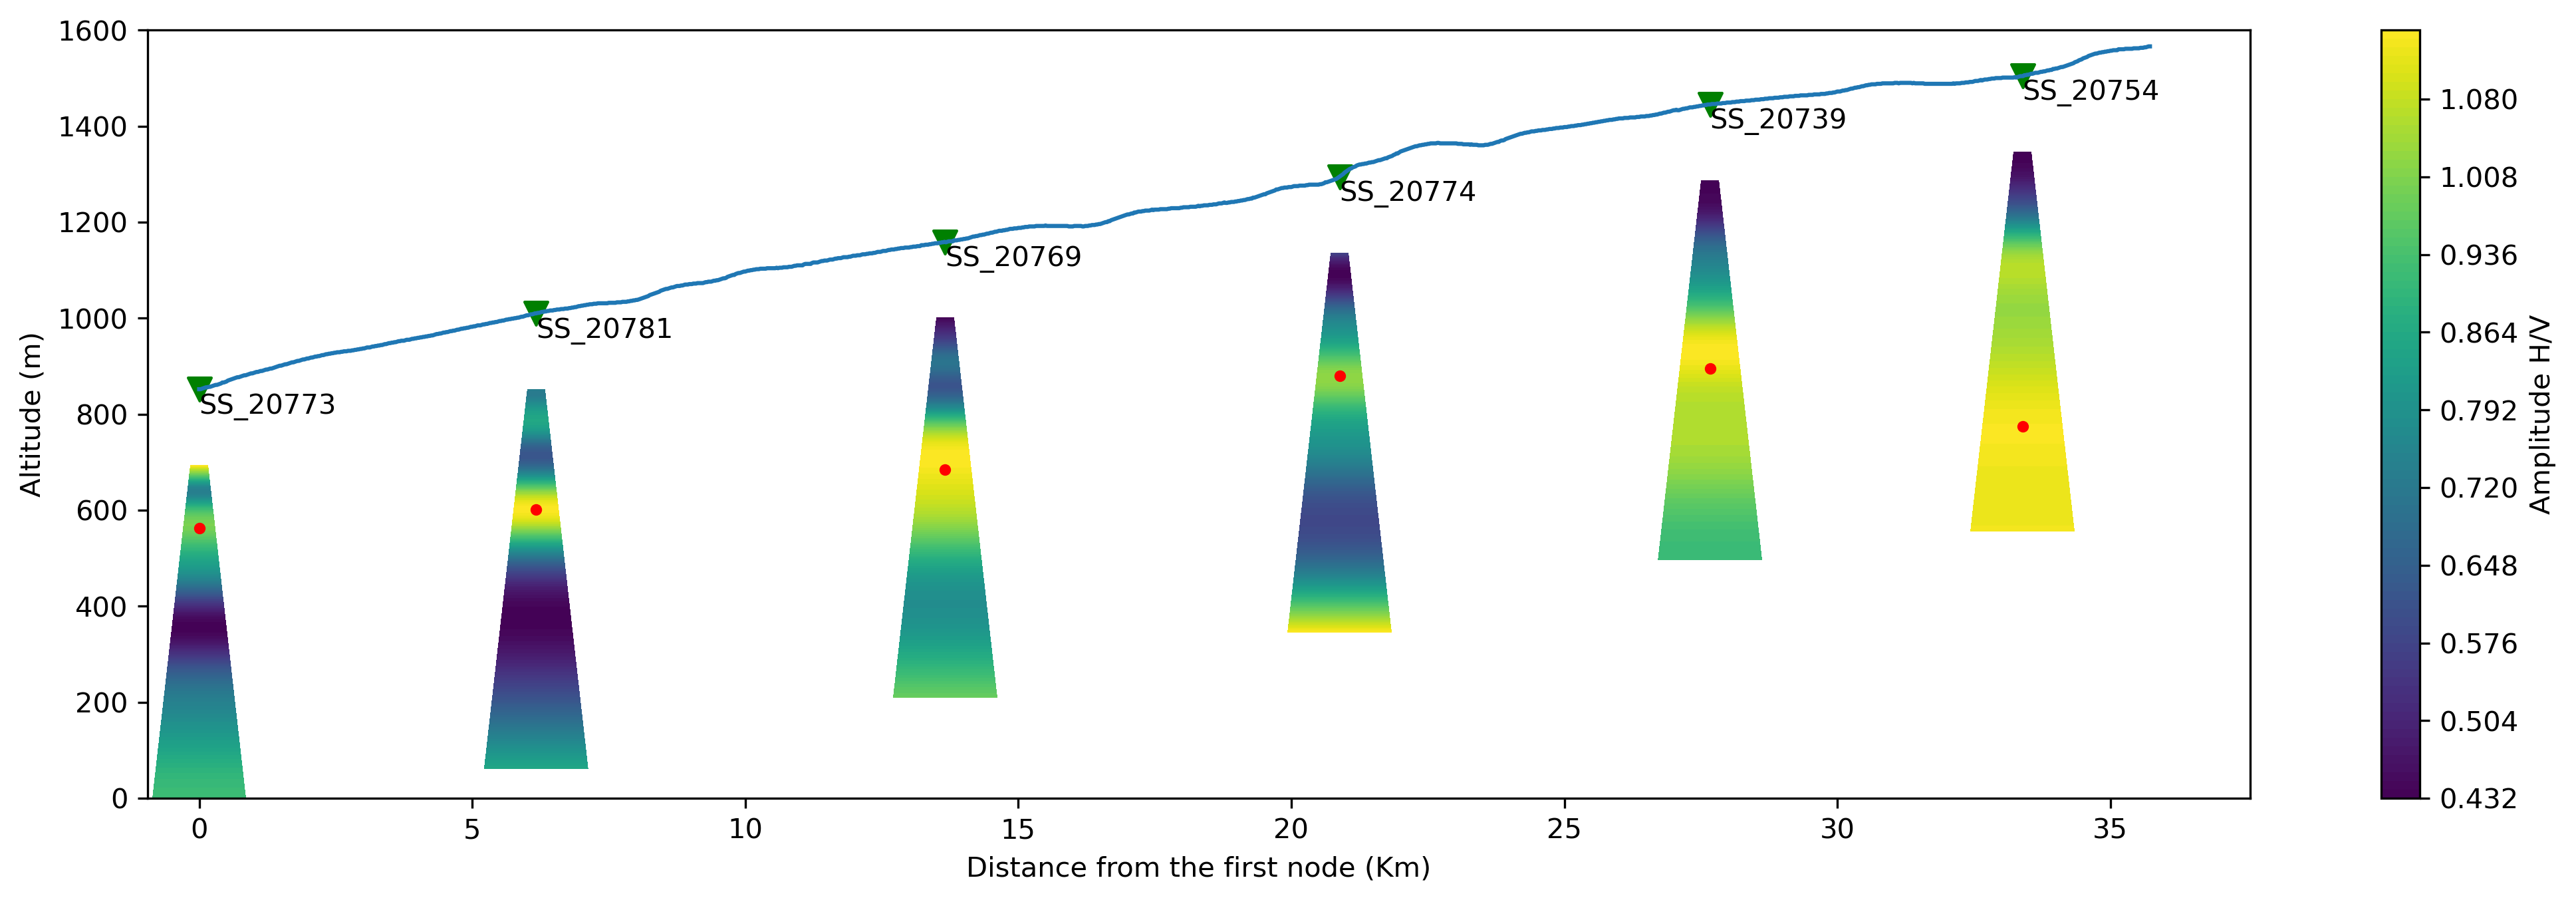

In [20]:
plt.figure(figsize=(17, 5), dpi=300)

for i in range(len(FREQ)) :
    L0 = [DIST[i]]*len(FREQ[i])
    L01 = L0 - ((vs/4)*np.power(FREQ[i], -1))/1000
    L1 = L0 + ((vs/4)*np.power(FREQ[i], -1))/1000
    L = []
    L.append(L01)
    L.append(L0)
    L.append(L1)
    L = np.array(L)
    
    HTOT = 1900/(4*np.array(FREQ[i]))
    HTOT = node_alt[i] - HTOT
    
    testFREQ = []
    testFREQ.append(HTOT)
    testFREQ.append(HTOT)
    testFREQ.append(HTOT)
    testFREQ = np.array(testFREQ)

    testAMP = []
    testAMP.append(AMP_AVE[i])
    testAMP.append(AMP_AVE[i])
    testAMP.append(AMP_AVE[i])
    testAMP = np.array(testAMP)
    plt.ylim(0,1600)
    plt.contourf(L, testFREQ, testAMP, 100)
   
plt.colorbar(label = "Amplitude H/V")
plt.scatter(DIST, node_alt, s=70 , c='green', marker='v', label = 'Nodes position')
plt.plot(pos, glac_alt, label = 'Glacier surface altitude')
plt.scatter(DIST, BED_ALT, s=10, c='red',marker='o')
#plt.errorbar(DIST,BED_ALT,xerr = XERROR, yerr = YERROR, linestyle='None', ecolor= 'red', capsize=2, capthick=2, label = 'Bedrock altitude determined with HVSR')
for i in range(len(DIST)) :
    plt.text(DIST[i],node_alt[i]-50,'SS_'+name_station[i])
plt.xlabel('Distance from the first node (Km)')
plt.ylabel('Altitude (m)')
plt.savefig('plot_ice_thick/HVintensity_ice_thickness.png')
plt.show()


## Automated HVSR computing with hvsrpy module

Credit : https://github.com/jpvantassel/hvsrpy/blob/main/examples/simple_hvsrpy_interface.ipynb

In [2]:
import hvsrpy
import obspy
import time
import datetime

In [9]:
def hv_maximum(sensor, starttime, endtime, windowlenght, f_min, f_max) :
    startprocess = time.process_time() 
    
    distribution_mc = "lognormal"
    
    width = 0.05 #Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
    bandwidth = 40 # Konno and Ohmachi smoothing constant


    # Boolean to control whether Butterworth filter is applied. 
    # Geopsy does not apply a bandpass filter.
    filter_bool = False        
    # Low-cut frequency for bandpass filter.
    filter_flow = 0.1                   
    # High-cut frequency for bandpass filter.
    filter_fhigh = 30                   
    # Filter order.
    filter_order = 5
    bp_filter = {"flag":filter_bool, "flow":filter_flow, "fhigh":filter_fhigh, "order":filter_order}

    # Minimum frequency after resampling
    resample_fmin = f_min  
    # Maximum frequency after resampling
    resample_fmax = f_max
    # Number of frequencies after resampling
    resample_fnum = 200
    # Type of resampling {'log', 'linear'}
    resample_type = 'log'

    resampling = {"minf":resample_fmin, "maxf":resample_fmax, "nf":resample_fnum, "res_type":resample_type}

    # Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
    peak_f_lower = f_min
    peak_f_upper = f_max
    # Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
    method = "geometric-mean"
    # If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
    azimuth = 0

    hv = sensor.hv(windowlenght, bp_filter, width, bandwidth, resampling, method, 
               f_low=peak_f_lower, f_high=peak_f_upper, azimuth=azimuth)
    
    max_freq = hv.mc_peak_frq(distribution_mc)
    
    max_amp = hv.mc_peak_amp(distribution_mc)
    
    endprocess = time.process_time()
    print('Processing accomplished in '+str(endprocess-startprocess)+' seconds')
    
    return max_freq, max_amp


In [24]:
HVFREQ = []
HVAMP = []
HVTIME = []

windowlenght = 200 #second
f_min = 0.5
f_max = 3

for day in range(3) :   
    root = 'D:\\Nodes_ablation_zone\\All_comp_DP_\\'
    stts = {'e': root+'453020781.'+str(10+day)+'.2022.05.'+str(15+day)+'.00.00.00.000.E.miniseed', 
            'n': root+'453020781.'+str(10+day)+'.2022.05.'+str(15+day)+'.00.00.00.000.N.miniseed',
            'z': root+'453020781.'+str(10+day)+'.2022.05.'+str(15+day)+'.00.00.00.000.Z.miniseed'}
    
    sensor = hvsrpy.Sensor3c.from_mseed(fnames_1c=stts)

    trace = obspy.read(root+'453020781.'+str(10+day)+'.2022.05.'+str(15+day)+'.00.00.00.000.E.miniseed')

    timesize = 60 #minutes
    timestep = timesize*60
    nbr_timestep = int(24*60*60/timestep)
    
    starttrace = trace[0].stats.starttime+i*timestep
    
    print('Starting the time loop')
    
    for i in range(nbr_timestep) :
        starttime = starttrace+i*timestep
        endtime = starttime+timestep
        #print([starttime, endtime])
        maxfreq, maxamp = hv_maximum(sensor, starttime, endtime, windowlenght, f_min, f_max)
        HVFREQ.append(maxfreq)
        HVAMP.append(maxamp)
        temptime = datetime.datetime.strptime(str(starttime+timestep/2), '%Y-%m-%dT%H:%M:%S.000000Z')
        HVTIME.append(temptime)

Starting the time loop
Processing accomplished in 33.609375 seconds
Processing accomplished in 30.421875 seconds
Processing accomplished in 32.359375 seconds
Processing accomplished in 29.921875 seconds
Processing accomplished in 30.015625 seconds
Processing accomplished in 29.359375 seconds
Processing accomplished in 30.265625 seconds
Processing accomplished in 31.078125 seconds
Processing accomplished in 30.359375 seconds
Processing accomplished in 29.296875 seconds
Processing accomplished in 28.96875 seconds
Processing accomplished in 30.640625 seconds
Processing accomplished in 31.53125 seconds
Processing accomplished in 29.921875 seconds
Processing accomplished in 29.21875 seconds
Processing accomplished in 28.84375 seconds
Processing accomplished in 30.171875 seconds
Processing accomplished in 30.203125 seconds
Processing accomplished in 30.34375 seconds
Processing accomplished in 28.90625 seconds
Processing accomplished in 31.0625 seconds
Processing accomplished in 29.421875 sec

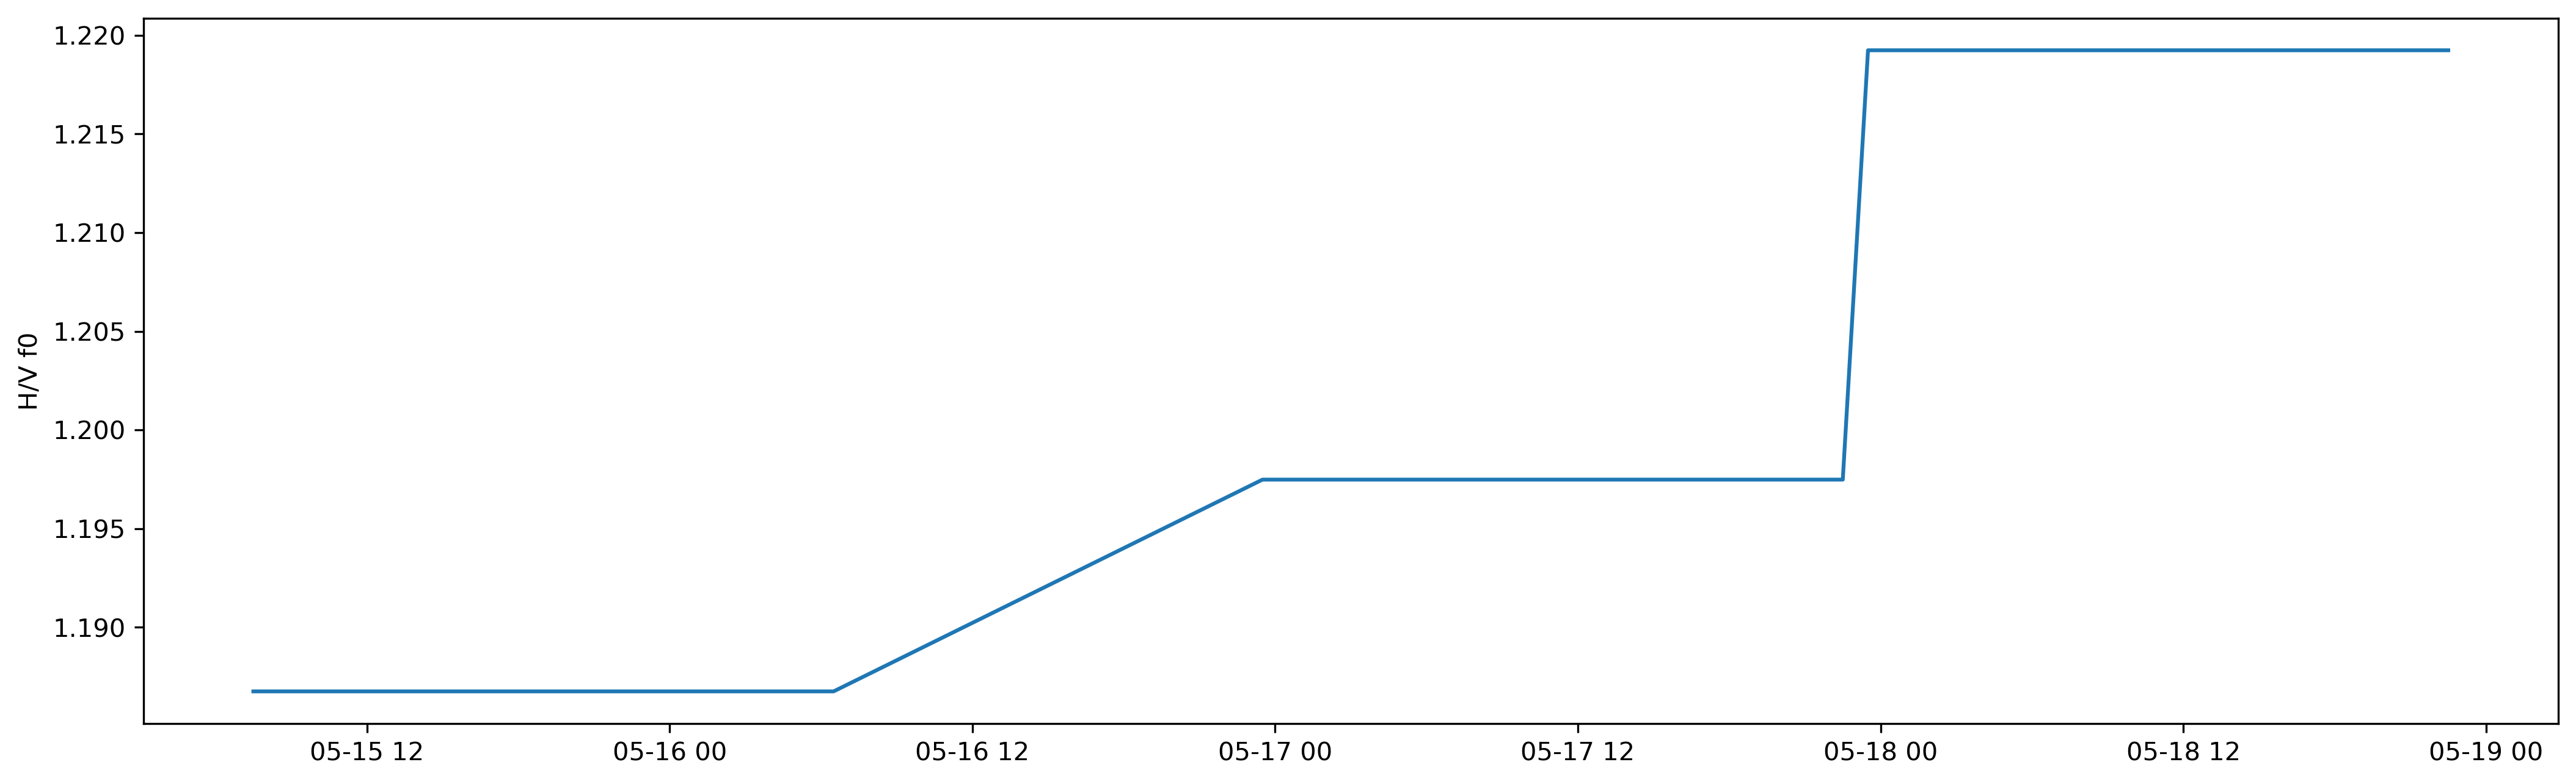

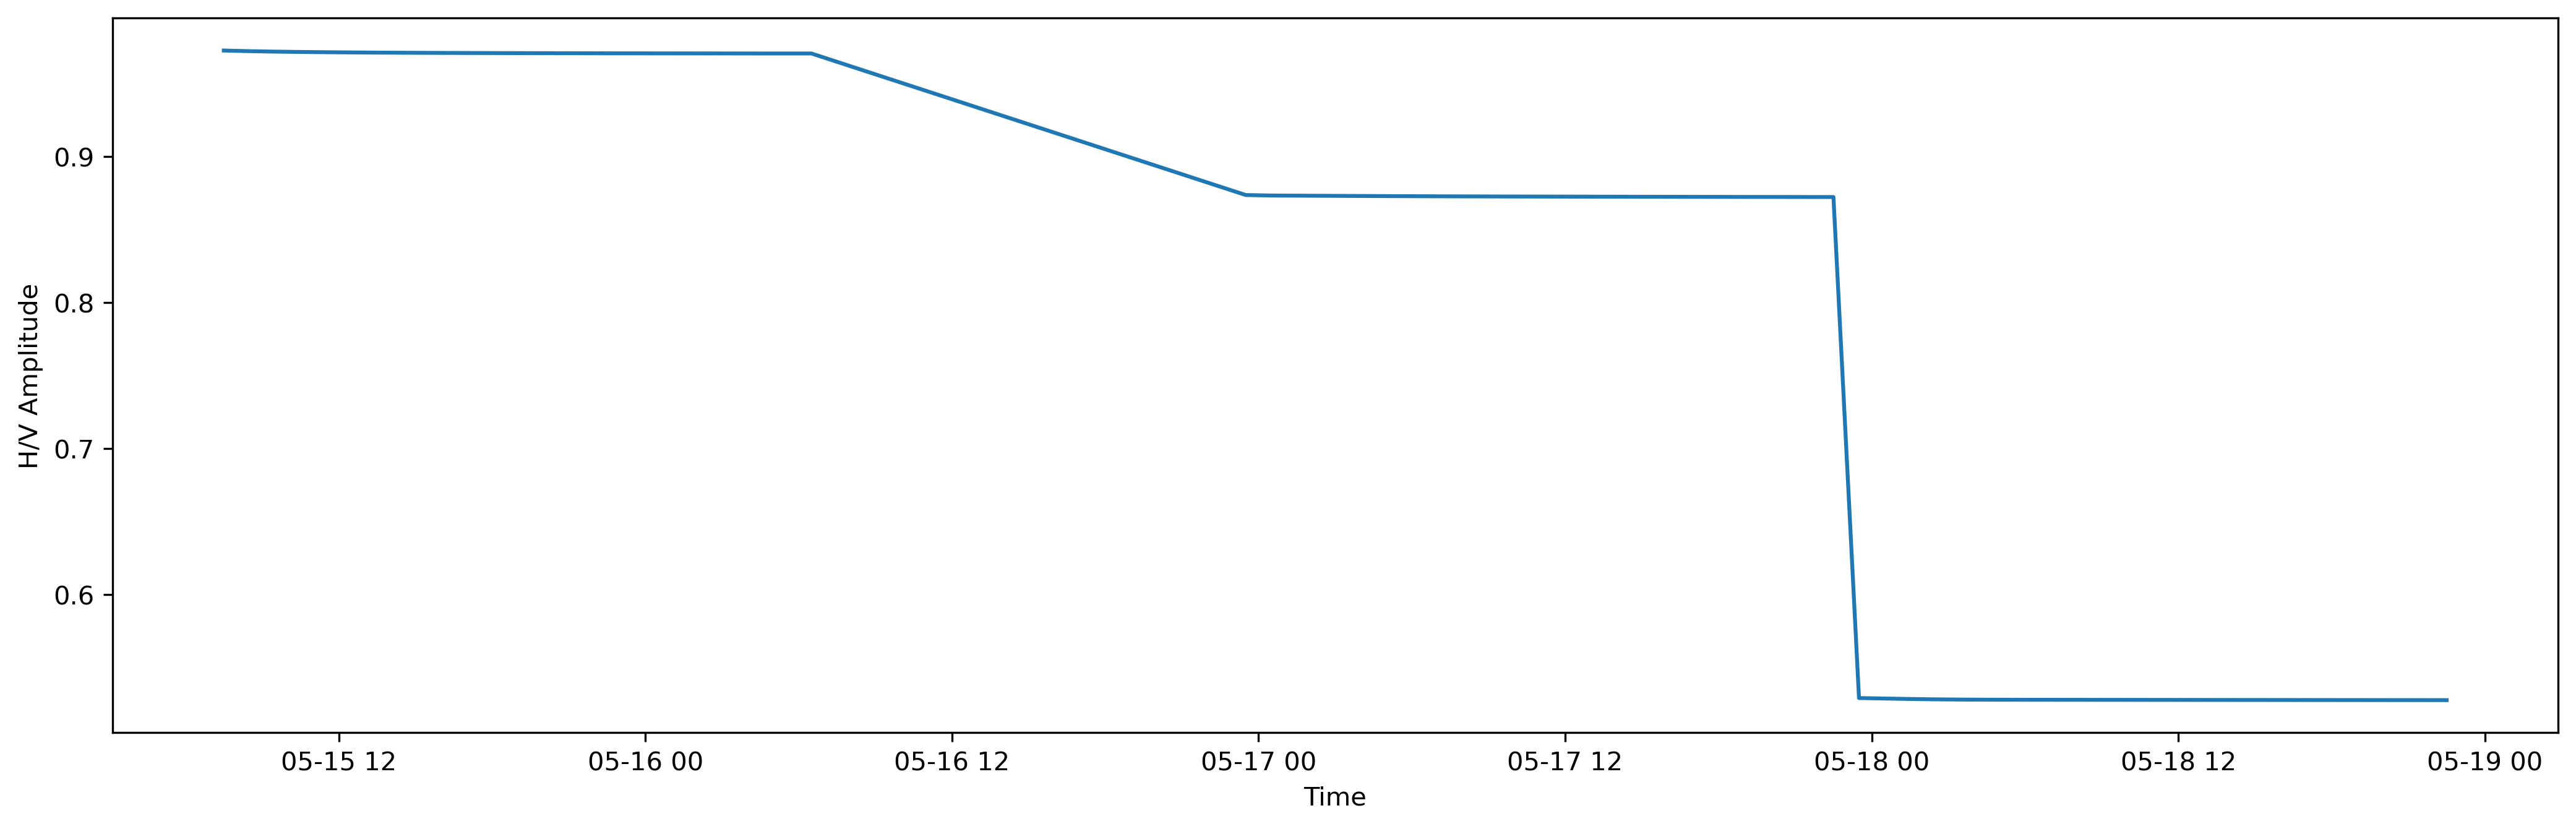

In [30]:
plt.figure(figsize=(17, 5), dpi=300)
plt.plot(HVTIME, HVFREQ)
plt.ylabel('H/V f0')
plt.show()
plt.figure(figsize=(17, 5), dpi=300)
plt.plot(HVTIME,HVAMP)
#plt.ylim(0.96,0.975)
plt.xlabel('Time')
plt.ylabel('H/V Amplitude')
plt.show()

In [35]:
np.array(HVAMP)

array([ 0.97267655,  0.97224028,  0.97193236,  0.97169409,  0.97150623,
        0.97135954,  0.97124213,  0.97115226,  0.97108074,  0.97101716,
        0.97096062,  0.97091405,  0.97087345,  0.97083679,  0.97080289,
        0.97077296,  0.97074551,  0.97072542,  0.97070902,  0.97069382,
        0.97067987,  0.97066748,  0.97065717,  0.97064906,  0.87367709,
        0.87333944,  0.87324562,  0.87315193,  0.8730561 ,  0.87297162,
        0.87289869,  0.87283328,  0.87277672,  0.87272799,  0.87268432,
        0.87264561,  0.8726095 ,  0.8725748 ,  0.87254174,  0.87251046,
        0.87248055,  0.87245199,  0.87242497,  0.8723991 ,  0.87237461,
        0.87235188,  0.87233049,  0.87230998,  0.52906168,  0.52873139,
        0.52842375,  0.52816744,  0.52801415,  0.52792904,  0.52789537,
        0.52787935,  0.52786454,  0.52784776,  0.52782947,  0.52781284,
        0.52779698,  0.52778119,  0.52776558,  0.52775022,  0.52773513,
        0.52772036,  0.52770595,  0.527692  ,  0.52767864,  0.52

In [34]:
np.array(HVAMP).shape

(72,)

In [43]:
starttime+timestep/2

2022-05-15T23:45:00.000000Z

In [ ]:
distribution_mc = "lognormal"



for amp in hv.amp[hv.valid_window_indices] :
    plt.plot(hv.frq, amp, c='grey')


plt.plot(hv.frq, hv.mean_curve(distribution_mc))
plt.plot(hv.frq, hv.nstd_curve(-1, distribution_mc))
plt.plot(hv.frq, hv.nstd_curve(+1, distribution_mc))
plt.xlim(0.5,3)
plt.ylim(0,2)
plt.show()

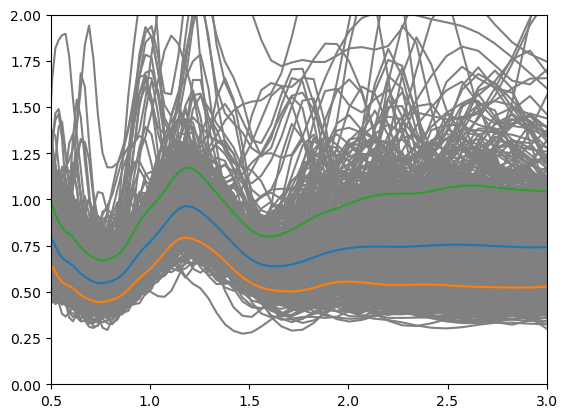

In [172]:
distribution_mc = "lognormal"

for amp in hv.amp[hv.valid_window_indices] :
    plt.plot(hv.frq, amp, c='grey')


plt.plot(hv.frq, hv.mean_curve(distribution_mc))
plt.plot(hv.frq, hv.nstd_curve(-1, distribution_mc))
plt.plot(hv.frq, hv.nstd_curve(+1, distribution_mc))
plt.xlim(0.5,3)
plt.ylim(0,2)
plt.show()